In [2]:
%matplotlib notebook

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

In [4]:
# import csv
rough = "Resources/suicide_rates.csv"
rough_data_df = pd.read_csv(rough)

In [9]:
# drop unnecessary columns
rough_df = rough_data_df.drop(columns=["HDI for year", "country-year", "generation", "gdp_per_capita ($)", "suicides_no", "population"])

# drop rows with missing values
rough_df.dropna(how='any')

# clean up age range fill
rough_df['age'] = rough_df['age'].replace({'35-54 years': '35-54', '25-34 years': '25-34', '55-74 years': '55-74', '75+ years': '75+', '15-24 years': '15-24', '5-14 years': '05-14'})

# rename columns
renamed_df = rough_df.rename(columns={"country":"Country", "year":"Year", "sex":"Sex", "age":"Age Range", "suicides/100k pop":"Suicides/100k pop", " gdp_for_year ($) ":"GDP(Year)"})

# filter for years 2000-2016
after_start_date = renamed_df["Year"] >= 2000
before_end_date = renamed_df["Year"] <= 2010
between_two_dates = after_start_date & before_end_date
filtered_date = renamed_df.loc[between_two_dates]

filtered_date_df = pd.DataFrame(filtered_date)

# Convert data type for GDP calculations 
filtered_date_df["GDP(Year)"] = filtered_date_df["GDP(Year)"].str.replace(',','').astype(int)

# Filter down countries 
target_countries= filtered_date_df.loc[(filtered_date_df['Country']== "United States")|  (filtered_date_df["Country"]== "Canada") | (filtered_date_df["Country"]== "Mexico") | (filtered_date_df["Country"]== "Antigua and Barbuda")|(filtered_date_df["Country"]== "Argentina")|(filtered_date_df["Country"]== "Bahamas")| (filtered_date_df["Country"]== "Barbados")|(filtered_date_df["Country"]== "Belize")|(filtered_date_df["Country"]== "Brazil")| (filtered_date_df["Country"]== "Chile")|(filtered_date_df["Country"]== "Colombia")|(filtered_date_df["Country"]== "Costa Rica")|(filtered_date_df["Country"]== "Cuba")| (filtered_date_df["Country"]== "Ecuador")|  (filtered_date_df["Country"]== "El Salvador")| (filtered_date_df["Country"]== "Grenada")| (filtered_date_df["Country"]== "Guatemala")| (filtered_date_df["Country"]== "Jamaica")|(filtered_date_df["Country"]== "Nicaragua")| (filtered_date_df["Country"]== "Panama")| (filtered_date_df["Country"]== "Paraguay")| (filtered_date_df["Country"]== "Puerto Rico")| (filtered_date_df["Country"]== "Saint Lucia")| (filtered_date_df["Country"]== "Saint Vincent and Grenadines")| (filtered_date_df["Country"]== "Suriname")| (filtered_date_df["Country"]== "Trinidad and Tobago")| (filtered_date_df["Country"] == "Uruguay"), :]

target_countries_df= pd.DataFrame(target_countries)

# Display table
target_countries_df.head()

,Country,Year,Sex,Age Range,Suicides/100k pop,GDP(Year)
420,Antigua and Barbuda,2000,male,55-74,30.00,830158778
421,Antigua and Barbuda,2000,male,35-54,9.97,830158778
422,Antigua and Barbuda,2000,female,15-24,0.00,830158778
423,Antigua and Barbuda,2000,female,25-34,0.00,830158778
424,Antigua and Barbuda,2000,female,35-54,0.00,830158778


In [10]:
# group by year and country / find averages

country_gdp = target_countries_df.groupby(["Year"])["GDP(Year)"].mean()
country_suicide = target_countries_df.groupby(["Year"])['Suicides/100k pop'].mean()

# create summary table
country_summary_df = pd.DataFrame({"GDP Mean": country_gdp, "Suicide Rate Mean": country_suicide})

country_summary_df["GDP Mean"] = country_summary_df["GDP Mean"].map("${:,.2f}".format)
country_summary_df["Suicide Rate Mean"] = country_summary_df["Suicide Rate Mean"].map("{:,.2f}".format)

country_summary_reset_df = country_summary_df.reset_index()

# display table
country_summary_reset_df

,Year,GDP Mean,Suicide Rate Mean
0,2000,"$523,374,607,282.52",8.98
1,2001,"$513,809,673,988.31",8.54
2,2002,"$520,495,832,680.35",8.74
3,2003,"$548,243,561,816.38",8.40
4,2004,"$593,083,518,206.50",8.08
5,2005,"$646,919,427,125.58",7.96
6,2006,"$698,477,655,388.73",7.92
7,2007,"$810,007,720,653.08",8.75
8,2008,"$811,550,167,667.20",8.41
9,2009,"$751,250,437,554.73",8.12


<IPython.core.display.Javascript object>


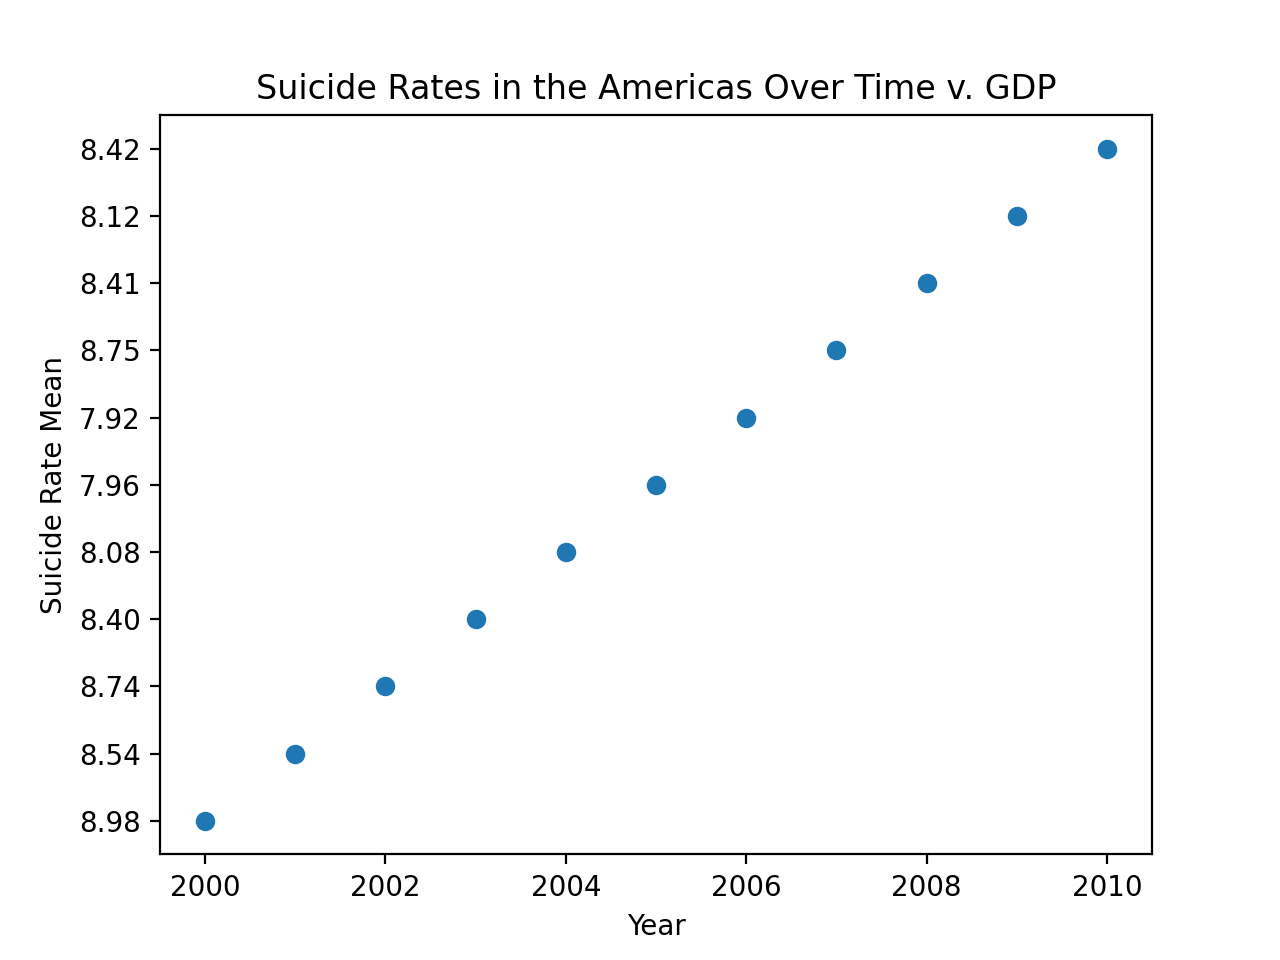

UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> dtype('<U32')

In [11]:
# Define axis
x_axis = country_summary_reset_df["Year"]
y_axis = country_summary_reset_df["Suicide Rate Mean"]

# Generate scatter plot
plt.scatter(x_axis, y_axis)

# Add labels and title
plt.xlabel("Year")
plt.ylabel("Suicide Rate Mean")
plt.title("Suicide Rates in the Americas Over Time v. GDP")   
    
# Use previous data for correlation coefficient 
correlation = st.pearsonr(x_axis, y_axis)
print(f"The correlation between years and suicide rates for the Americas is {round(correlation[0],2)}.")

# Calculate linear regression 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Add linear regression to scatter plot 
plt.scatter(x_axis, y_axis)
plt.plot(x_axis, regress_values,"r-")

# Annotate
plt.annotate(line_eq,(21,36),fontsize=15,color="red")

# Add labels and title 
plt.xlabel("Year")
plt.ylabel("Suicide Rate Mean")
plt.title("Suicide Rates in the Americas Over Time v. GDP")

# Show plot
plt.show()


In [12]:
# Group by Country, Year, Ages / find averages
age_gdp = target_countries_df.groupby(["Age Range"])["GDP(Year)"].mean()
age_suicide = target_countries_df.groupby(["Age Range"])['Suicides/100k pop'].mean()

# Create summary table
age_summary_df = pd.DataFrame({"GDP Mean": age_gdp, "Suicide Rate Mean": age_suicide})

age_summary_df["GDP Mean"] = age_summary_df["GDP Mean"].map("${:,.2f}".format)
age_summary_df["Suicide Rate Mean"] = age_summary_df["Suicide Rate Mean"].map("{:,.2f}".format)

age_summary_reset_df = age_summary_df.reset_index()

# Display table
age_summary_reset_df


,Age Range,GDP Mean,Suicide Rate Mean
0,05-14,"$656,569,575,842.52",0.67
1,15-24,"$656,569,575,842.52",7.59
2,25-34,"$656,569,575,842.52",8.96
3,35-54,"$656,569,575,842.52",9.39
4,55-74,"$656,569,575,842.52",9.87
5,75+,"$656,569,575,842.52",13.85


In [13]:
age_summary_reset_df.plot.bar(color="b")
plt.title("title goes here")
plt.xlabel("GDP Mean")
plt.ylabel("Suicide Rate")

plt.show()
plt.tight_layout()

TypeError: no numeric data to plot

<IPython.core.display.Javascript object>


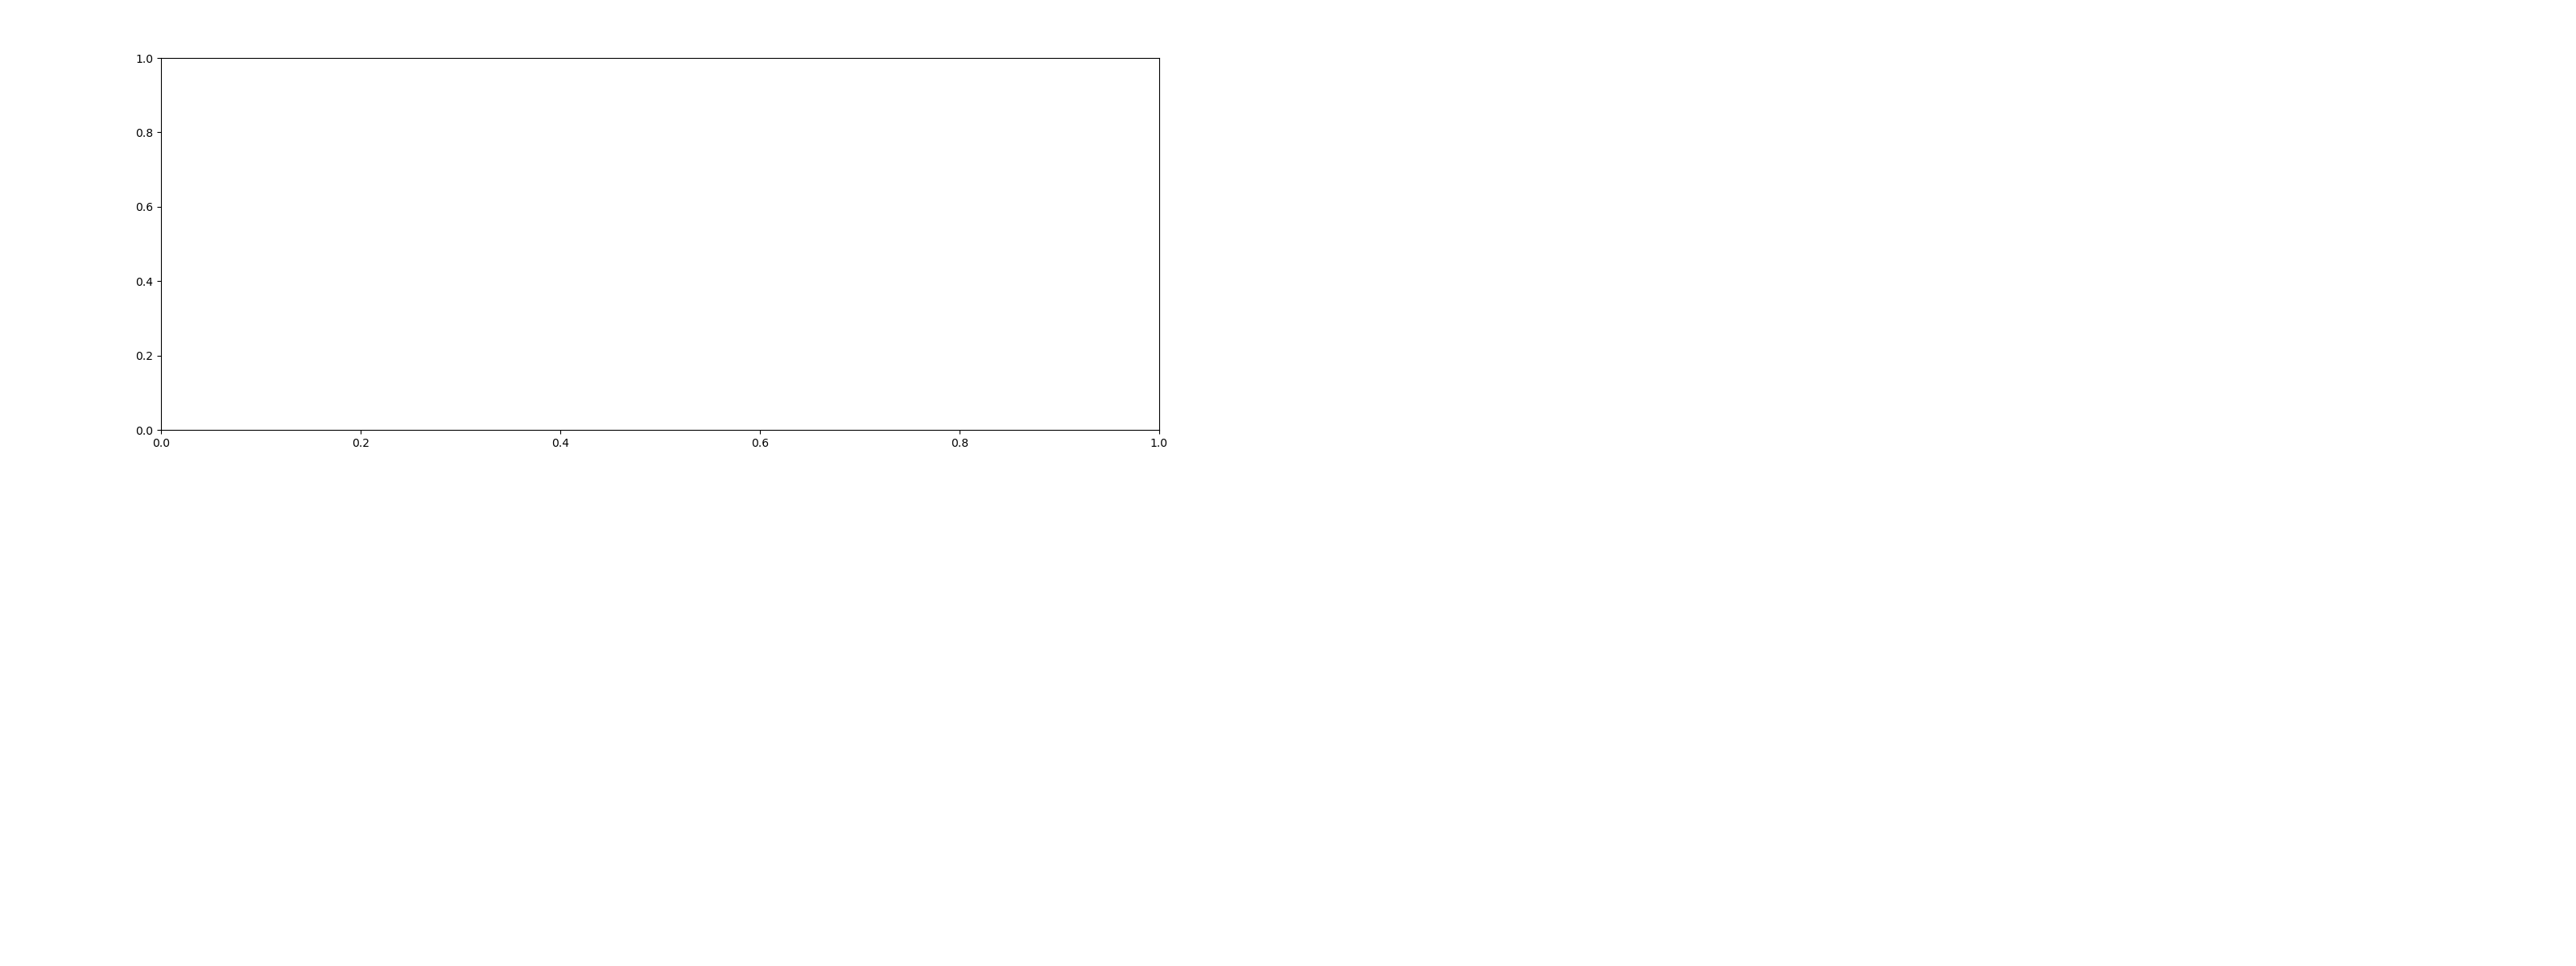

TypeError: unsupported operand type(s) for -: 'str' and 'float'

In [14]:
# define figure
fig, ax = plt.subplots(1, figsize=(16, 6))
# numerical x
x = age_summary_reset_df['GDP Mean']
# plot bars
plt.bar(x - 0.3, age_summary_reset_df['Age Range'], width = 0.2, color = '#1D2F6F')
#plt.bar(x - 0.1, df_grouped['EU_Sales'], width = 0.2, color = '#8390FA')
#plt.bar(x + 0.1, df_grouped['JP_Sales'], width = 0.2, color = '#6EAF46')
#plt.bar(x + 0.3, df_grouped['Other_Sales'], width = 0.2, color = '#FAC748')
# remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# x y details
plt.ylabel('Millions of copies')
plt.xticks(x, age_summary_reset_df.index)
plt.xlim(-0.5, 31)
# grid lines
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.2)
# title and legend
plt.title('Video Game Sales By Platform and Region', loc ='left')
plt.legend(['NA', 'EU', 'JP', 'Others'], loc='upper left', ncol = 4)
plt.show()

In [34]:
# Group by Country, Year, Sex / find averages
sex_gdp = target_countries_df.groupby(["Sex", "Year"])["GDP(Year)"].mean()
sex_suicide = target_countries_df.groupby(["Sex", "Year"])['Suicides/100k pop'].mean()

# Creat summary table
sex_summary_df = pd.DataFrame({"GDP Mean": sex_gdp, "Suicide Rate Mean": sex_suicide})

sex_summary_df["GDP Mean"] = sex_summary_df["GDP Mean"].map("${:,.2f}".format)
sex_summary_df["Suicide Rate Mean"] = sex_summary_df["Suicide Rate Mean"].map("{:,.2f}".format)

sex_summary_reset_df = sex_summary_df.reset_index()

# Display table
sex_summary_reset_df


summary_women_df = target_countries_df.loc[(target_countries_df["Sex"] == "female")]


summary_men_df = target_countries_df.loc[(target_countries_df["Sex"] == "male")]

summary_men_df.count()


Country              1692
Year                 1692
Sex                  1692
Age Range            1692
Suicides/100k pop    1692
GDP(Year)            1692
dtype: int64

In [16]:
sex_summary_reset_df["Country"] = pd.Categorical(sex_summary_reset_df["Country"])

# Set the figure size
plt.figure(figsize=(10, 10))

# Scatterplot
plt.scatter(
    x = sex_summary_reset_df["Sex"], 
    y = sex_summary_reset_df["GDP Mean"], 
    s = sex_summary_reset_df["Suicide Rate Mean"], 
    c = sex_summary_reset_df["Country"].cat.codes, 
    cmap="tab20", 
    edgecolors="white", 
    linewidth=2);
 
# Add titles (main and on axis)
plt.yscale('log')
plt.xlabel("Sex")
plt.ylabel("GDP Mean")
plt.title("a title goes here")
#plt.ylim(?,?)
#plt.xlim(?, ?);

# Display plot
plt.show()

KeyError: 'Country'

In [17]:
#Are suicide rates higher in developing countries or developed countries?

#heatmap of suicide rates globally 


In [18]:
#Country v.  Overall suicide rate
#mean_sui = filtered_date_df['Suicides/100k pop'].mean()
#filtered_date_df['Above Average?'] = (filtered_date_df['Suicides/100k pop'] >= mean_sui)

df_Country_Overall_suicide_rate = filtered_date_df.groupby('Country')['Suicides/100k pop'].mean()
#filtered_date_df.head()

#define 'Overall suicide rate'
#mean_sui1 = filtered_date_df['Suicides/100k pop'].mean()
mean_sui2 = df_Country_Overall_suicide_rate.mean()
#print(mean_sui1)raw average
#print(mean_sui2)average of averages
#df_Country_Overall_suicide_rate['Suicides/100k pop'] 
#df_df_Country_Overall_suicide_rate() 
Deviation = df_Country_Overall_suicide_rate - mean_sui2
country_mean_df = pd.DataFrame({"Country Mean":df_Country_Overall_suicide_rate, "Global Mean":mean_sui2, "Deviation":Deviation})
country_mean_df

,Country Mean,Global Mean,Deviation
Country,,,
Albania,3.381667,11.911424,-8.529757
Antigua and Barbuda,1.094000,11.911424,-10.817424
Argentina,10.629848,11.911424,-1.281575
Armenia,3.032685,11.911424,-8.878738
Aruba,8.175152,11.911424,-3.736272
...,...,...,...
United Arab Emirates,1.317917,11.911424,-10.593507
United Kingdom,6.715303,11.911424,-5.196121
United States,12.459167,11.911424,0.547743


In [19]:
#Gender v. Country & Suicide rate
Gender_tmp_df = filtered_date_df.groupby(['Country','Sex'])['Suicides/100k pop'].mean()


Gender_tmp_df.head()

Country              Sex   
Albania              female    2.475909
                     male      4.287424
Antigua and Barbuda  female    0.000000
                     male      2.188000
Argentina            female    3.537273
Name: Suicides/100k pop, dtype: float64

In [20]:
#Age Range v. Country & Suicide rate
Age_tmp_df = filtered_date_df.groupby(['Country','Age Range'])['Suicides/100k pop'].mean()

Age_tmp_df




Country     Age Range
Albania     05-14        0.524091
            15-24        3.287273
            25-34        4.156364
            35-54        3.963182
            55-74        3.438182
                           ...   
Uzbekistan  15-24        7.851250
            25-34        9.237500
            35-54        9.488750
            55-74        7.795625
            75+          6.735625
Name: Suicides/100k pop, Length: 570, dtype: float64

In [ ]:
#suicide rates in the United States for 2017-2019?

In [ ]:
#Aggrate data by gender/gdp & suicide rate for 2017-2019

In [ ]:
#Aggrate Data by gender/gdp & suicide rate for 2017-2019